<a href="https://colab.research.google.com/github/open-mmlab/mmclassification/blob/master/docs_zh-CN/tutorials/MMClassification_tools_cn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 基于 Colab 的 MMClassification tools 教程

在本教程中会介绍如下内容：

* 如何安装 MMCls
* 数据下载
* 准备配置文件
* shell 命令行

## 安装 MMClassification

在使用 MMClassification 之前，我们需要配置环境，步骤如下：

- 安装 Python, CUDA, C/C++ compiler 和 git
- 安装 PyTorch (CUDA 版)
- 安装 mmcv
- 克隆 mmcls github 代码库然后安装

因为我们在 Google Colab 进行实验，Colab 已经帮我们完成了基本的配置，我们可以直接跳过前面两个步骤 。

### 检查环境

In [1]:
%cd /content

/content


In [2]:
!pwd

/content


In [3]:
# 检查 nvcc 版本
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [4]:
# 检查 GCC 版本
!gcc --version

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [5]:
# 检查 PyTorch 的安装情况
import torch, torchvision
print(torch.__version__)
print(torch.cuda.is_available())

1.9.0+cu111
True


### 安装 MMCV

MMCV 是 OpenMMLab 代码库的基础库。Linux 环境的安装 whl 包已经提前打包好，大家可以直接下载安装。

需要注意 PyTorch 和 CUDA 版本，确保能够正常安装。

在前面的步骤中，我们输出了环境中 CUDA 和 PyTorch 的版本，分别是 11.1 和 1.9.0，我们需要选择相应的 MMCV 版本。

另外，也可以安装完整版的 MMCV-full，它包含所有的特性以及丰富的开箱即用的 CUDA 算子。需要注意的是完整版本可能需要更长时间来编译。

In [6]:
# 安装 mmcv
!pip install mmcv -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html
# !pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html


### 克隆并安装 MMCls

接着，我们从 github 上克隆下 mmcls 最新代码库并进行安装。

In [7]:
# 下载 mmcls 代码库
!git clone https://github.com/open-mmlab/mmclassification.git
%cd mmclassification/

# 从源码安装 MMClassification
!pip install -e . 

fatal: destination path 'mmclassification' already exists and is not an empty directory.
/content/mmclassification
Obtaining file:///content/mmclassification
  Attempting uninstall: mmcls
    Found existing installation: mmcls 0.16.0
    Can't uninstall 'mmcls'. No files were found to uninstall.
  Running setup.py develop for mmcls


In [8]:
# 检查 MMClassification 的安装情况
import mmcls
print(mmcls.__version__)

0.16.0


In [9]:
# 下载预训练模型
!mkdir checkpoints
!wget https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth -P checkpoints

mkdir: cannot create directory ‘checkpoints’: File exists
--2021-10-11 08:18:28--  https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14206911 (14M) [application/octet-stream]
Saving to: ‘checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth.5’

mobilenet_v2_batch2 100%[===================>]  13.55M  7.65MB/s    in 1.8s    

2021-10-11 08:18:31 (7.65 MB/s) - ‘checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth.5’ saved [14206911/14206911]



In [10]:
# 下载分类数据集文件
!wget https://www.dropbox.com/s/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip?dl=0 -O cats_dogs_dataset.zip
!mkdir data
!unzip -q cats_dogs_dataset.zip -d ./data/

--2021-10-11 08:18:31--  https://www.dropbox.com/s/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip [following]
--2021-10-11 08:18:31--  https://www.dropbox.com/s/raw/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4cc3369ee3aa8a59d8e5baf143.dl.dropboxusercontent.com/cd/0/inline/BX20wcgVboqmCYLywEnuZlaxl50WNpSeRrmVoNJIwLyYpY8rl8nhAEbNV__ve9DJcXYZvw7on-Jt95gFhbek5DuwMxGT4d6nJbO9uofnVgMt8GaFD3Tsl7A33kuHVwRAGFsNpcNgElFfuUWo8AWsc54H/file# [following]
--2021-10-11 08:18:31--  https://uc4cc3369ee3aa8a59d8e5baf143.dl.dropboxusercontent.com/cd/0/inline/BX20wcgVboqmCYLywEnuZlaxl50WNpSeRrmVoNJI

完成下载和解压之后， "Cats and Dogs Dataset" 文件夹下的文件结构如下:
```
data/cats_dogs_dataset
├── classes.txt
├── test.txt
├── val.txt
├── training_set
│   ├── training_set
│   │   ├── cats
│   │   │   ├── cat.1.jpg
│   │   │   ├── cat.2.jpg
│   │   │   ├── ...
│   │   ├── dogs
│   │   │   ├── dog.2.jpg
│   │   │   ├── dog.3.jpg
│   │   │   ├── ...
├── val_set
│   ├── val_set
│   │   ├── cats
│   │   │   ├── cat.3.jpg
│   │   │   ├── cat.5.jpg
│   │   │   ├── ...
│   │   ├── dogs
│   │   │   ├── dog.1.jpg
│   │   │   ├── dog.6.jpg
│   │   │   ├── ...
├── test_set
│   ├── test_set
│   │   ├── cats
│   │   │   ├── cat.4001.jpg
│   │   │   ├── cat.4002.jpg
│   │   │   ├── ...
│   │   ├── dogs
│   │   │   ├── dog.4001.jpg
│   │   │   ├── dog.4002.jpg
│   │   │   ├── ...
```

可以通过 shell 命令 `tree data/cats_dogs_dataset` 查看文件结构。

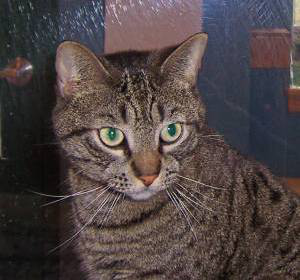

In [11]:
# 获取一张图像可视化
from PIL import Image
Image.open('data/cats_dogs_dataset/training_set/training_set/cats/cat.1.jpg')

### 支持新的数据集

MMClassification 要求数据集必须将图像和标签放在同级目录下。有两种方式可以支持自定义数据集。

最简单的方式就是将数据集转换成现有的数据集格式（比如 ImageNet）。另一种方式就是新建一个新的数据集类。细节可以查看 [文档](https://github.com/open-mmlab/mmclassification/blob/master/docs_zh-CN/tutorials/new_dataset.md).

在这个教程中，为了方便学习，我们已经将 “猫狗分类数据集” 按照 ImageNet 的数据集格式进行了整理。

标准文件包括:

1. 类别列表。每行代表一个类别。
    ```
    cats
    dogs
    ```
2. 训练/验证/测试标签。
每行包括一个文件名和其相对应的标签。
    ```
    ...
    cats/cat.3769.jpg 0
    cats/cat.882.jpg 0
    ...
    dogs/dog.3881.jpg 1
    dogs/dog.3377.jpg 1
    ...
    ```

## 命令行工具的使用

MMCls 同样提供了命令行工具，提供如下功能:

1. 模型训练
2. 模型微调
3. 模型测试
4. 推理计算

模型训练的过程与模型微调的过程一致，我们已经看到 Python API 的推理和模型微调过程。接下来我们将会看到如何使用命令行工具完成这些任务。更过细节可以参考 [文档](https://github.com/open-mmlab/mmclassification/blob/master/docs_zh-CN/getting_started.md).

### 模型微调

通过命令行进行模型微调步骤如下：

1. 准备自定义数据集
2. 数据集适配 MMCls 要求
3. 在 py 脚本中修改配置文件
4. 使用命令行工具进行模型微调

第1，2步与之前的介绍一致，我们将会介绍后面2个步骤的内容。

#### 在 py 脚本中修改配置文件

为了能够复用不同配置文件中常用的部分，我们支持多配置文件继承。比如模型微调 MobileNetV2 ，新的配置文件可以通过继承 `configs/_base_/models/mobilenet_v2_1x.py` 来创建模型的基本结构。 继承 `configs/_base_/datasets/cats_dogs_dataset.py` 来使用之前定义好的数据集。继承 `configs/_base_/schedules/cats_dogs_finetune.py` 来自定义学习率策略。为了能够运行设定的学习率策略，还需要继承  `configs/_base_/default_runtime.py`.

最后的配置文件应该显示如下

```
# Save to "configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py"
_base_ = [
    '../_base_/models/mobilenet_v2_1x.py',
    '../_base_/datasets/imagenet_bs32_pil_resize.py',
    '../_base_/schedules/imagenet_bs256_epochstep.py',
    '../_base_/default_runtime.py'
]
```

此外，也可以不使用这种继承的方式，而直接构建完整的配置文件，比如 `configs/mnist/lenet5.py`.

这里我们使用了重构好的数据集，如果想要完全使用自定义的数据集，还需要重新构建一个数据集配置，这个配置会覆盖之前的内容。

首先，修改模型配置并保存为 `configs/_base_/models/mobilenet_v2_1x_cats_dogs.py`。这个新的配置文件需要根据分类问题的类别来调整模型 `head` 的 `num_classes`。预训练模型的权重，除了最后一层线性层，其他的部分一般选择复用。

In [12]:
%%writefile configs/_base_/models/mobilenet_v2_1x_cats_dogs.py
_base_ = ['./mobilenet_v2_1x.py']
model = dict(
    backbone=dict(
        init_cfg = dict(
            type='Pretrained', 
            checkpoint='checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth', 
            prefix='backbone')
    ),
    head=dict(
        num_classes=2,
        topk = (1, )
    ))

Overwriting configs/_base_/models/mobilenet_v2_1x_cats_dogs.py


第二，数据配置，保存为 `configs/_base_/datasets/cats_dogs_dataset.py`.

In [13]:
%%writefile configs/_base_/datasets/cats_dogs_dataset.py
_base_ = ['./imagenet_bs32.py']
img_norm_cfg = dict(
     mean=[124.508, 116.050, 106.438],
     std=[58.577, 57.310, 57.437],
     to_rgb=True)

data = dict(
    # 每个 gpu 上的 batch size 和 num_workers 设置，根据计算机情况设置
    samples_per_gpu = 32,
    workers_per_gpu=2,
    # 指定训练集路径
    train = dict(
        data_prefix = 'data/cats_dogs_dataset/training_set/training_set',
        classes = 'data/cats_dogs_dataset/classes.txt'
    ),
    # 指定验证集路径
    val = dict(
        data_prefix = 'data/cats_dogs_dataset/val_set/val_set',
        ann_file = 'data/cats_dogs_dataset/val.txt',
        classes = 'data/cats_dogs_dataset/classes.txt'
    ),
    # 指定测试集路径
    test = dict(
        data_prefix = 'data/cats_dogs_dataset/test_set/test_set',
        ann_file = 'data/cats_dogs_dataset/test.txt',
        classes = 'data/cats_dogs_dataset/classes.txt'
    )
)
# 修改评估指标设置
evaluation = dict(metric_options={'topk': (1, )})

Overwriting configs/_base_/datasets/cats_dogs_dataset.py


第三是学习率策略。模型微调的策略与默认策略差别很大。微调一般会要求更小的学习率和更少的训练周期。最后保存为 `configs/_base_/schedules/cats_dogs_finetune.py`.

In [14]:
%%writefile configs/_base_/schedules/cats_dogs_finetune.py
# 优化器设置
# 设定针对 batch size 为 128 的学习率
optimizer = dict(type='SGD', lr=0.01, momentum=0.9, weight_decay=0.0001)
optimizer_config = dict(grad_clip=None)
# 学习率策略
lr_config = dict(policy='step', step=[1])
runner = dict(type='EpochBasedRunner', max_epochs=2)

Overwriting configs/_base_/schedules/cats_dogs_finetune.py


最后，运行环境配置。直接使用默认的配置。我们将上述所有修改和保存的配置文件集中到一个文件中，并保存为 `configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py`.


In [15]:
%%writefile configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py
_base_ = [
    '../_base_/models/mobilenet_v2_1x_cats_dogs.py', '../_base_/datasets/cats_dogs_dataset.py',
    '../_base_/schedules/cats_dogs_finetune.py', '../_base_/default_runtime.py'
]

Overwriting configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py


#### 使用命令行进行模型微调

我们使用 `tools/train.py` 进行模型微调:

```
python tools/train.py ${CONFIG_FILE} [optional arguments]
```

如果你希望指定训练过程中相关文件的保存位置，可以增加一个参数 `--work_dir ${YOUR_WORK_DIR}`.

通过增加参数 `--seed ${SEED}`，设置随机种子以保证结果的可重复性，而参数 `--deterministic`则会启用 cudnn 的确定性选项，进一步保证可重复性，但可能降低些许效率。

这里我们使用 `MobileNetV2` 和数据集 `CatsDogsDataset` 作为示例

In [16]:
!python tools/train.py \
  configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py \
  --work-dir work_dirs/mobilenet_v2_1x_cats_dogs \
  --seed 0 \
  --deterministic

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/bricks/transformer.py:28: UserWarning: Fail to import ``MultiScaleDeformableAttention`` from ``mmcv.ops.multi_scale_deform_attn``, You should install ``mmcv-full`` if you need this module. 
  warnings.warn('Fail to import ``MultiScaleDeformableAttention`` from '
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarni

### 测试模型

使用 `tools/test.py` 对模型进行测试:

```
python tools/test.py ${CONFIG_FILE} ${CHECKPOINT_FILE} [optional arguments]
```

这里有一些可选参数可以进行配置:

- `--metrics`: 评价方式，这依赖于数据集，比如准确率 a
- `--metric-options`: 对于评估过程的自定义操作，如 topk=1.

更多细节请参看 `tools.test.py` 。

这里依然使用示例 `MobileNetV2`.

In [17]:
!python tools/test.py configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py work_dirs/mobilenet_v2_1x_cats_dogs/latest.pth --metrics=accuracy --metric-options=topk=1

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/bricks/transformer.py:28: UserWarning: Fail to import ``MultiScaleDeformableAttention`` from ``mmcv.ops.multi_scale_deform_attn``, You should install ``mmcv-full`` if you need this module. 
  warnings.warn('Fail to import ``MultiScaleDeformableAttention`` from '
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarni

### 推理计算

我们用下面的命令进行推理计算并保存计算结果。

```shell
python tools/test.py ${CONFIG_FILE} ${CHECKPOINT_FILE} [--out ${RESULT_FILE}]
```

可选参数：

- `RESULT_FILE`: 输出结果的文件名。如果不指定，计算结果不会被保存。支持的格式包括json, pkl 和 yml

这里依然使用示例 `MobileNetV2`.

In [18]:
!python tools/test.py configs/mobilenet_v2/mobilenet_v2_1x_cats_dogs.py work_dirs/mobilenet_v2_1x_cats_dogs/latest.pth --out=results.json

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/bricks/transformer.py:28: UserWarning: Fail to import ``MultiScaleDeformableAttention`` from ``mmcv.ops.multi_scale_deform_attn``, You should install ``mmcv-full`` if you need this module. 
  warnings.warn('Fail to import ``MultiScaleDeformableAttention`` from '
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarni

导出的json 文件中保存了所有样本的推理结果、分类结果和分类得分

class_scores: [0.9462895393371582, 0.0537104494869709]
pred_class: cats
pred_label: 0
pred_score: 0.9462895393371582


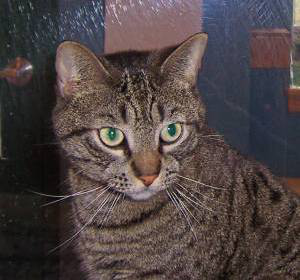

In [19]:
import json

with open("./results.json", 'r') as f:
    results = json.load(f)

# 展示第一张图片的结果信息
print('class_scores:', results['class_scores'][0])
print('pred_class:', results['pred_class'][0])
print('pred_label:', results['pred_label'][0])
print('pred_score:', results['pred_score'][0])
Image.open('data/cats_dogs_dataset/training_set/training_set/cats/cat.1.jpg')

也可以使用MMCls提供的可视化函数imshow_infos更好的展示预测结果

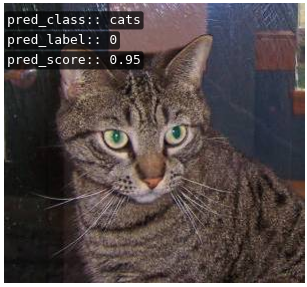

In [20]:
from mmcls.core.visualization import imshow_infos

filepath = 'data/cats_dogs_dataset/training_set/training_set/cats/cat.1.jpg'

result = {
    'pred_class:':results['pred_class'][0],
    'pred_label:': results['pred_label'][0],
    'pred_score:': results['pred_score'][0]
}

img = imshow_infos(filepath, result)